# Exploratory Data Analysis

### Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('extended_salary_data.csv')

### Visualize the data using a scatter plot

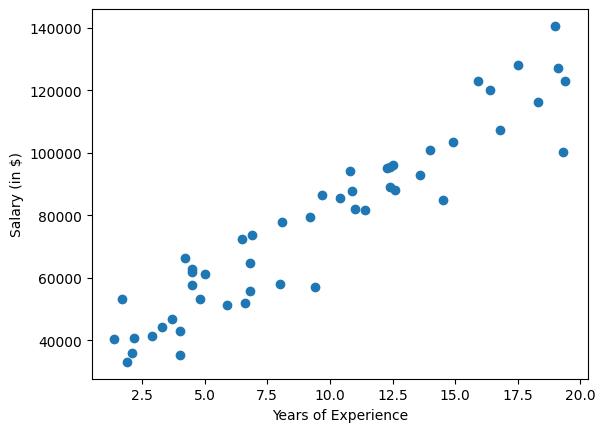

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in $)')
plt.show()

### Compute basic statistics for each column

In [6]:
print(df.describe())

       YearsExperience        Salary
count        50.000000      50.00000
mean          9.480000   77370.54740
std           5.485491   28298.92442
min           1.400000   33048.80000
25%           4.500000   53861.88000
50%           9.300000   78598.65000
75%          13.350000   95356.22500
max          19.400000  140646.44000


# Build a Linear Regression Model

### Split the data into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train a linear regression model on the training set

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Obtain the coefficients of the linear model

In [19]:
print(f'Slope: {lr.coef_[0]}')
print(f'Intercept: {lr.intercept_}')

Slope: 4858.011982026115
Intercept: 31150.227368954525


# Evaluate the Model

### Use the model to make predictions on the testing set

In [27]:
for i, x in enumerate(X_test['YearsExperience'].values):
    print(f'Years of Experience: {x}')
    print(f'Predicted: {lr.predict([[x]])[0]}')
    print(f'Actual: {y_test.iloc[i]}')
    print()

Years of Experience: 12.3
Predicted: 90903.77474787575
Actual: 95116.36

Years of Experience: 19.4
Predicted: 125395.65982026115
Actual: 123149.18

Years of Experience: 1.4
Predicted: 37951.44414379109
Actual: 40240.84

Years of Experience: 10.4
Predicted: 81673.55198202613
Actual: 85571.13

Years of Experience: 14.9
Predicted: 103534.60590114364
Actual: 103343.52

Years of Experience: 10.8
Predicted: 83616.75677483657
Actual: 94035.33

Years of Experience: 14.0
Predicted: 99162.39511732013
Actual: 100917.61

Years of Experience: 4.2
Predicted: 51553.87769346421
Actual: 66380.37

Years of Experience: 6.6
Predicted: 63213.106450326886
Actual: 51936.65

Years of Experience: 4.0
Predicted: 50582.275297058986
Actual: 35214.78



c:\Users\Arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Line

### Calculate evaluation metrics

In [31]:
print(f'MAE: {abs(lr.predict(X_test) - y_test).mean()}')
print(f'MSE: {((lr.predict(X_test) - y_test) ** 2).mean()}')

MAE: 6648.13570094768
MSE: 73803221.0932978


### Plot the regression line over the scatter plot of the data

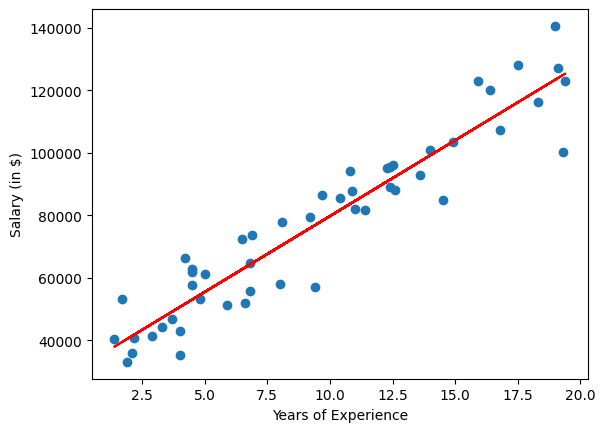

In [32]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in $)')
plt.show()

# Bonus Task

In [37]:
import numpy as np
df['NumProjectsCompleted'] = 4*np.log(df['YearsExperience']+1) + np.random.randint(-2, 2, df.shape[0])
df.astype({'NumProjectsCompleted': 'int'})

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,7
1,19.1,127213.68,13
2,14.9,103343.52,11
3,12.4,88988.96,11
4,4.0,35214.78,5
5,4.0,42801.56,6
6,2.1,35893.61,5
7,17.5,128071.22,11
8,12.4,95436.18,9
9,14.5,84869.60,10


In [39]:
X2 = df[['YearsExperience', 'NumProjectsCompleted']]
y = df['Salary']
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [40]:
lr2 = LinearRegression()
lr2.fit(X2_train, y_train)

LinearRegression()

In [42]:
print(f'MAE: {abs(lr2.predict(X2_test) - y_test).mean()}')
print(f'MSE: {((lr2.predict(X2_test) - y_test) ** 2).mean()}')

MAE: 6592.060713796966
MSE: 72739249.45728487
